# Math 124 - Programming for Mathematical Applications
UC Berkeley, Spring 2021

## Homework 5
Due Wednesday, February 24

### Problem 1

What does the following function compute (in terms of $x,y$)? Explain why.

```julia
function fun1(x,y)
    if x == 0
        return y
    else
        return fun1(x - 1, x + y)
        println(x-1)
    end
end
```

This is a *recursive* function. Namely, what the program does is add is add $(x+y)$ to $(x-1)$ and then adds $[(x+y)+(x-1)]$ to $(x-2)$ and so on, and once it reaches the base case, it will terminate and add all the results from the previous function calls, namely we get the following pattern; $(x+y) + \sum_{i=1}^{x-1}(x-i) = y + \sum_{i=0}^{x-1}(x-i) = \frac{x (x+1)}{2} + y$.

### Problem 2

What does the following function compute (in terms of $a,b$)? Explain why.


```julia
function fun2(a,b)
    if b == 0
        return 1
    elseif b % 2 == 0
        return fun2(a * a, b ÷ 2)
    else
        return fun2(a * a, b ÷ 2) * a
    end
end
```

Function *fun2* is a recursive function. The function takes in a,b and computes a raised to the power of b, i.e. a^b. This is done in the following manner; if b is 0, then it returns 1 since thats the value of any value raised to 0 so we get that that *fun2(a,0) = 1*. Now as for the case when b (or the power) is not 0, what we compute is the following: if b is a multiple of 2, just raise a to 2, set b equal to its quotient with 2, instead if b is odd, repeat the same aforementioned procedure but set b equal to its quotient with 2 and instead multiply the recursive call with an another extra a now, and repeat. 

### Problem 3

Predict the output of the code below (try first without running it):

```julia
function fun3(x)
    if x > 0
        x -= 1
        fun3(x)
        print(x, " ")
        x -= 1
        fun3(x)
    end
end

fun3(5)
```

The code should produce the following sequence of inputs and outputs: 
0, 1, 2, 0, 3, 0, 1, 4, 0, 1, 2, 0

The explanation is the following;\
calls fun(5)\
calls fun(4)\
calls fun(3)\
calls fun(2)\
calls fun(1)\
     -calls fun(0) then breaks out\
     -then prints 0\
     -sets x to -1\
     -calls fun(-1) which breaks out
call returns to fun(2),\
     -then prints 1\
     -sets x to 0\
     -calls f(0) and then returns it\
calls returns to fun(3)\
     -then prints 2\
     -calls fun(1)\
     -prints 0\
call returns to fun(4)\
     -then prints 3\
     -fun(2) is called\
     -prints 0 \
     -prints 1\
call retunrs to fun(5)\
     -prints 4\
     -sets x to 3\
     -calls fun(3)\
     -sets x to 2 \
     -calls fun(2)\
     -sets x to 1\
     -calls fun(1)\
     -set x to 0\
     -fun(0) breaks out\
     -returns back to f(1)\
     -prints 0\
     -returns back to fun(2)\
     -prints 1\
     -returns back to fun(3)\
     -prints 2\
     -returns back to x equal to 0\
     -prints 0\
end of program

### Problem 4 - Mandelbrot set

The Mandelbrot set is the set of complex numbers $z_0 = C$ such that the quadratic recurrence equation

$$
z_{n+1} = z_n^2 + C
$$

does not tend to infinity.

To visualize the set, you will:

1. Create a matrix of points $C$ in the complex plane
2. Iterate the recurrence for each point $C$ until $|z_n|>4$, and count the number of iterations $n$
3. For the points where the number of iterations exceeds `maxiter`, we will assume that the sequence is convergent and set $n=0$
4. Visualize the set by an image plot of the $n$-values


### Problem 4(a)

Write a function with the syntax

```julia
    function mkCmatrix(xmin, xmax, ymin, ymax, nx, ny)
```

which computes `nx` equidistributed numbers $x_k$ between `xmin` and `xmax`, `ny` equidistributed numbers $y_j$ between `ymin` and `ymax`, and returns the `ny`-by-`nx` matrix $C$ with complex entries $C_{jk} = x_k + iy_j$.

In [1]:
function mkCmatrix(xmin, xmax, ymin, ymax, nx, ny)
    
    x = range(xmin,stop=xmax,length=nx) # equidistributed values for x
    y = range(ymin,stop=ymax,length=ny) # equidistributed values for y
    
    # init the matrix of complex values of size ny by nx
    C = Array{Complex{Float64},2}(undef, ny, nx)
    
    # populate the matrix where the rows are from y and columns are from x
    for j = 1:length(y)
        for k = 1:length(x)
            C[j,k] = (x[k] + y[j]im)
        end
    end
    
    
    return C
end

mkCmatrix (generic function with 1 method)

### Problem 4(b)

Write a function

```julia
   function mandelbrot_set(C, maxiter)
```

which takes a matrix $C$ as described above and an integer `maxiter`, and returns an integer matrix $N$ of the same size as $C$ containing the iteration counts $n$ as described above.

In [2]:
function mandelbrot_set(C, maxiter)
    
    # init the matrix which stores the count of iterations for each entry 
    N = Array{Int64,2}(undef, size(C,1), size(C,2))
    
    # iterate through matrix C and we run the z_{n+1} = z_n^2 + C algorithm on each entries
    for i = 1:size(C,1)
        for j = 1:size(C,2)
            
            constant = C[i,j] # the value of the constant for the iteration
            count = 0
            
            # we repeat the process while the value of |z_n| is still less than 4
            while (abs(C[i,j]) ≤ 4)
                
                # check whilst looping to make sure the maxiter hasnt been reached
                # or else break out and set count to 0
                if count ≥ maxiter
                    count = 0
                    break
                end
                
                # the iteration specified for the mandelbrot set
                C[i,j] = (C[i,j])^2 + constant
                count += 1
                
            end
            
            # store the count value for that specific entry into the matrix
            N[i,j] = count
            
        end
        
    end
    
    return N
    
end

mandelbrot_set (generic function with 1 method)

### Problem 4(c)

Run the code below to visualize the set.

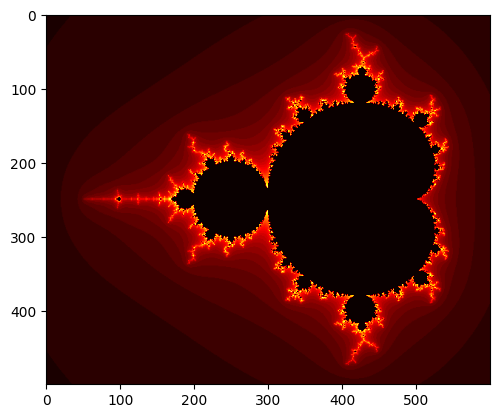

In [3]:
C = mkCmatrix(-2.25, 0.75, -1.25, 1.25, 600, 500)
maxiter = 50
N = mandelbrot_set(C, 40)

using PyPlot
imshow(N, cmap=ColorMap("hot"));

### Problem 5 - Koch curve

A Koch curve between two points $(x_1,y_1)$ and $(x_2,y_2)$ can be defined as follows:

1. If `level` is zero, draw a straight line between the two points
2. Otherwise, define the following 3 additional points

$$
\begin{align*}
\Delta x &= x2 - x1 \\
\Delta y &= y2 - y1 \\
x_3 &= x1 + \Delta x / 3 \\
y_3 &= y1 + \Delta y / 3 \\
x_5 &= x1 + 2\Delta x / 3 \\
y_5 &= y1 + 2\Delta y / 3 \\
x_4 &= (x1 + x2) / 2 - \Delta y / 2\sqrt{3} \\
y_4 &= (y1 + y2) / 2 + \Delta x / 2\sqrt{3} \\
\end{align*}
$$

3. Draw Koch curves of level `level - 1` between the following pairs of points:

$$
\begin{align*}
(x_1, y_1)&\text{ to }(x_3, y_3) \\
(x_3, y_3)&\text{ to }(x_4, y_4) \\
(x_4, y_4)&\text{ to }(x_5, y_5) \\
(x_5, y_5)&\text{ to }(x_2, y_2) \\
\end{align*}
$$

### Problem 5(a)

Write a function

```julia
function koch_curve(x1, y1, x2, y2, level)
```

which draws a Koch curve as described above.

In [4]:
#=
import Pkg; 
Pkg.add("PyPlot")
=#
using PyPlot

In [5]:
function koch_curve(x1, y1, x2, y2, level)
    
    # base case for when level is 0 we plot the line between the two points
    if level == 0
        x = [x1,x2]
        y = [y1,y2]
        PyPlot.plot(x, y, color="r") 
        axis("equal")
    else
        
        # we define the 8 values at each step of the level
        Δx = Float64(x2 - x1)
        Δy = Float64(y2 - y1)
        x3 = Float64(x1 + Δx/3)
        y3 = Float64(y1 + Δy/3)
        x5 = Float64(x1 + 2Δx/3)
        y5 = Float64(y1 + 2Δy/3)
        x4 = Float64((x1 + x2)/2) - (Δy/(2*sqrt(3)))
        y4 = Float64((y1 + y2)/2) + (Δx/(sqrt(3)*2))        
        
        # now we recursively call the function on each new 4 new pairs of points
        koch_curve(x1,y1,x3,y3,level-1)
        koch_curve(x3,y3,x4,y4,level-1)
        koch_curve(x4,y4,x5,y5,level-1)
        koch_curve(x5,y5,x2,y2,level-1)
        
        
    end
    
end

koch_curve (generic function with 1 method)

### Problem 5(b)

Draw a Koch curve of level 4 between the points $(0,0)$ and $(3,0)$. Use `axis("equal")`.

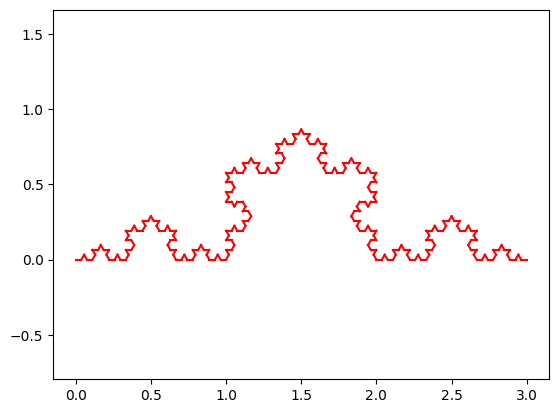

(-0.15000000000000002, 3.15, -0.04330127018922194, 0.9093266739736606)

In [6]:
koch_curve(0,0,3,0,4)

### Problem 5(c)

Draw three Koch curves of level 4 to make the outline of a snowflake.

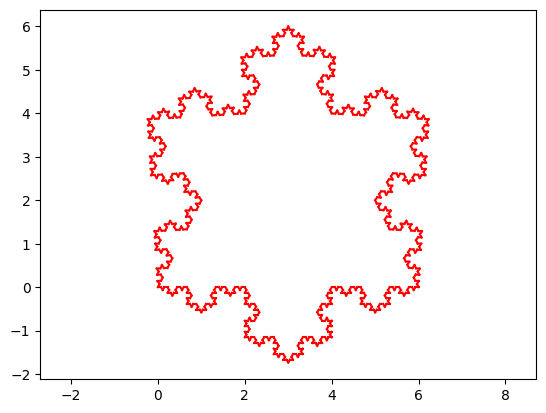

(-0.5552558883257652, 6.555255888325766, -2.1186533479473213, 6.386602540378444)

In [7]:
# the koch curves are each defined by the coordinates 
# to be on the sides of a triangle
koch_curve(0,0,3,6,4)
koch_curve(3,6,6,0,4)
koch_curve(6,0,0,0,4)